In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
E_Na=0.05
g_Na=560
g_Kd=60
E_Kd=-0.09
E_K=-0.09
g_M=0.75
tau_max=0.608
g_Leak=0.205
E_Leak=-0.0703
C_membrane=0.02448
vt=-0.0562
dt = 0.0001
t_final = 1
T = np.arange(0, t_final, dt)
N = T.size
V = np.zeros((N, 5))
Iinj = np.full((N,),0.)
Iinj[2000:] = 0.009
for i in range(len(V)-1):
    v = V[i,0]
    m = V[i,1]
    h = V[i,2]
    n = V[i,3]
    p = V[i,4]
    I = Iinj[i]

    I_Leak = g_Leak*(E_Leak - v)
    I_Na = g_Na*m**3*h*(E_Na - v)
    I_Kd = g_Kd*n**4*(E_Kd - v)
    I_M = g_M*p*(E_K - v)

    alpham = (-0.32)*(v - vt - 0.013)/(np.exp(-(v - vt - 0.013)/0.004) - 1)*1e6
    betam = 0.28*(v - vt - 0.040)/(np.exp((v - vt - 0.040)/0.005) - 1)*1e6
    alphah = 0.128*np.exp(-(v - vt - 0.017)/0.018)*1e3
    betah = 4/(1 + np.exp(-(v - vt - 0.040)/0.005))*1e3
    alphan = (-0.032)*(v - vt - 0.015)/(np.exp(-(v - vt - 0.015)/0.005) - 1)*1e6
    betan = 0.5*np.exp(-(v - vt - 0.010)/0.040)*1e3
    p_inf = 1/(1 + np.exp(-(v + 0.035)/0.010))
    tau = tau_max/(3.3*np.exp((v + 0.035)/0.020) + np.exp(-(v + 0.035)/0.020))

    dv = (1/C_membrane)*(I_Leak + I_Na + I_Kd  + I) *dt
    dp = (p_inf - p)/tau *dt
    dm = (1 - np.exp(-(alpham + betam)*dt)) * (alpham/(alpham + betam) - m)
    dh = (1 - np.exp(-(alphah + betah)*dt)) * (alphah/(alphah + betah) - h)
    dn = (1 - np.exp(-(alphan + betan)*dt)) * (alphan/(alphan + betan) - n)

    V[i + 1][0] = V[i][0] + dv
    V[i + 1][1] = V[i][1] + dm
    V[i + 1][2] = V[i][2] + dh
    V[i + 1][3] = V[i][3] + dn
    V[i + 1][4] = V[i][4] + dp


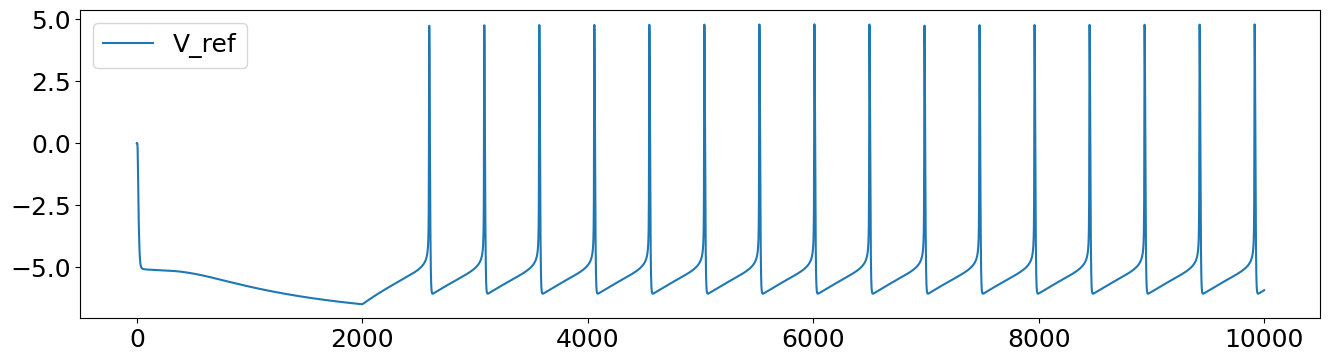

In [11]:
plt.figure(figsize=(16, 4))
plt.rcParams["font.size"] = 18
plt.plot(V[:,0] * 100,label='V_ref')
plt.legend()
plt.show()

In [4]:
I_stim = np.full((N,),0.)
I_stim[2000:] = 0.9
def euler_3d(V, dt):
    a_fn=1.56
    a_fp=-0.56
    b_fn=-1.13
    c_fn=5.5
    a_gn=1
    a_gp=10.28
    b_gn=0.41
    c_gn=-5.5

    a_hn=0.35
    a_hp=-5.13
    b_hn=-7.2
    c_hn=-2.7

    r_g=0.06
    I_0=-5.12
    phi=4.75
    tau=0.006
    r_h=15.72
    epsilion=0.07

    k = 3.2
    b_fp = a_fn * b_fn / a_fp
    c_fp = a_fn * b_fn ** 2 + c_fn - a_fp * b_fp ** 2
    b_gp = r_g - a_gn * (r_g - b_gn) / a_gp
    c_gp = a_gn * (r_g - b_gn) ** 2 - a_gp * (r_g - b_gp) ** 2 + c_gn
    b_hp = r_h - a_hn * (r_h - b_hn) / a_hp
    c_hp = a_hn * (r_h - b_hn) ** 2 + c_hn - a_hp * (r_h - b_hp) ** 2

    for i in range(len(V) - 1):
        Istim = I_stim[i]
        v = V[i, 0]
        n = V[i, 1]
        q = V[i, 2]
        if v < 0:
            fv = a_fn * (v - b_fn) ** 2 + c_fn
        else:
            fv = a_fp * (v - b_fp) ** 2 + c_fp

        if v < r_g:
            gv = a_gn * (v - b_gn) ** 2 + c_gn
        else:
            gv = a_gp * (v - b_gp) ** 2 + c_gp

        if v < r_h:
            hv = a_hn * (v - b_hn) ** 2 + c_hn
        else:
            hv = a_hp * (v - b_hp) ** 2 + c_hp

        dv = phi * (fv - n - 0 + I_0 + Istim*k) / tau * dt  # calculate dv
        dn = (gv - n) / tau * dt  # calculate dn
        dq = (hv - q) * epsilion / tau * dt
        V[i + 1][0] = V[i][0] + dv
        V[i + 1][1] = V[i][1] + dn
        V[i + 1][2] = V[i][2] + dq
        # 如果状态超出了一个范围（-100 到 100），则将其限制在该范围内。
        if V[i + 1][0] > 100:
            V[i + 1][0] = 100
        elif V[i + 1][0] < -100:
            V[i + 1][0] = -100
        if V[i + 1][1] > 100:
            V[i + 1][1] = 100
        elif V[i + 1][1] < -100:
            V[i + 1][1] = -100
        if V[i + 1][2] > 100:
            V[i + 1][2] = 100
        elif V[i + 1][2] < -100:
            V[i + 1][2] = -100

V_pqn = np.zeros((N, 3))
V_pqn[0]=[-4.6,21.5,0.6]
euler_3d(V_pqn,dt)

In [5]:
def normalized(V_init):
    V_init_min = np.min(V_init[:, 0])
    V_init_max = np.max(V_init[:, 0])

    if V_init_max - V_init_min == 0:
        Vt_normalized = np.zeros_like(V_init[:, 0])
    else:
        Vt_normalized = (V_init[:, 0] - V_init_min) / (V_init_max - V_init_min)

    V_normalized = V_init.copy()
    V_normalized[:, 0] = Vt_normalized
    return V_normalized
V_pqn_nor= normalized(V_pqn)
V_nor = normalized(V)

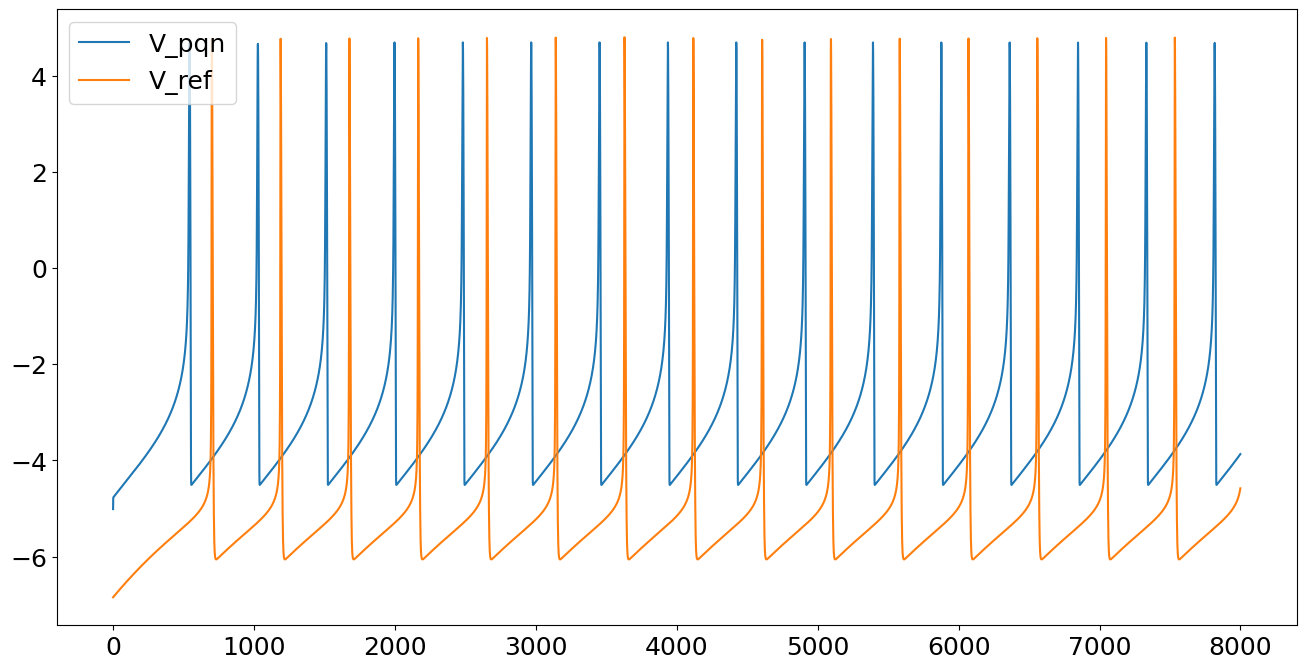

In [9]:
plt.figure(figsize=(16, 8))
plt.rcParams["font.size"] = 18
plt.plot(V_pqn[2000:,0],label='V_pqn')
plt.plot(V[2000:,0] * 100,label='V_ref')
plt.legend()
plt.show()